# 👉 Cálculos manuais

##🎮 Coeficientes e Intercepto em uma regressão linear simples

Na era dos computadores, a reta de regressão é normalmente calculada com software estatístico. No entanto, os cálculos são relativamente fáceis e estão disponíveis aqui para qualquer pessoa interessada. Para entendermos em maiores detalhes o que acontece "por baixo dos panos", vamos reproduzir esses cálculos manualmente.

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df = pd.DataFrame(
    [
        [1,	1],
        [2,	2],
        [3,	1.3],
        [4,	3.75],
        [5,	2.25]
    ],
    columns=list('XY')
)
df

,X,Y
0,1,1.00
1,2,2.00
2,3,1.30
3,4,3.75
4,5,2.25


Os cálculos são baseados nas estatísticas mostradas na Tabela abaixo. MX é a média de X, MY é a média de Y, sX é o desvio padrão de X, sY é o desvio padrão de Y e r é a correlação entre X e Y.

In [ ]:
stats = df[['X', 'Y']].agg(['mean', 'std'])
stats

,X,Y
mean,3.000000,2.060000
std,1.581139,1.072031


In [ ]:
r = df[['X', 'Y']].corr().at['X', 'Y']
r

np.float64(0.6268327489789576)

A **inclinação ($b$)** pode ser calculada da seguinte forma:

$b = r \frac{s_Y}{s_X}$

e o **intercepto ($A$)** pode ser calculado como

 $A = M_Y - bM_X$.

Para esses dados,

In [ ]:
b = r * stats.at['std', 'Y'] / stats.at['std', 'X']
b

np.float64(0.425)

In [ ]:
A = stats.at['mean', 'Y'] - b * stats.at['mean', 'X']
A

np.float64(0.7850000000000001)

Observe que todos os cálculos foram apresentados em termos de estatísticas amostrais, e não de parâmetros populacionais. As fórmulas são as mesmas; basta usar os valores dos parâmetros para médias, desvios-padrão e correlação.

##🎮 Coeficientes e Intercepto em uma regressão linear múltipla

Mas isso não funciona para múltiplas variáveis. Por isso, na regressão múltipla, a única forma geral e precisa é com matrizes.

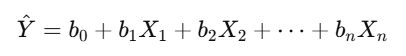

Para calcular os coeficientes (inclusive o intercepto), usamos álgebra matricial. A fórmula universal é:

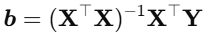

Onde:

* X: matriz de entrada com todas as variáveis explicativas (cada coluna é um 𝑋𝑖, e a primeira coluna é só 1s — para o intercepto)
* 𝑋⊤: transposta da matriz 𝑋
* 𝑌: vetor coluna da variável dependente
* b: vetor coluna com os coeficientes [𝑏0,𝑏1,...,𝑏𝑛]

Exemplo prático com 2 variáveis independentes

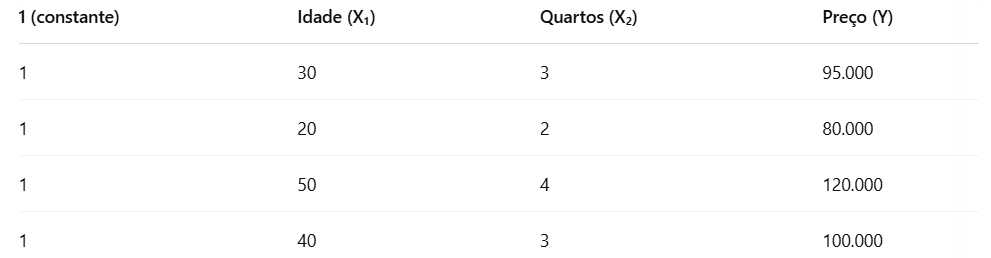

Montamos as matrizes:

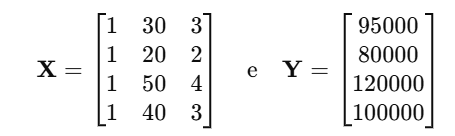

In [ ]:
# Exemplo de dados simples para regressão múltipla "na mão"
# Variáveis: idade, quartos -> Preço da casa (Y)
X = np.array([
    [1, 30, 3],
    [1, 20, 2],
    [1, 50, 4],
    [1, 40, 3]
])  # 1ª coluna é a constante (intercepto)

Y = np.array([
    [95000],
    [80000],
    [120000],
    [100000]
])

In [ ]:
X_T = X.T
X_T

array([[ 1,  1,  1,  1],
       [30, 20, 50, 40],
       [ 3,  2,  4,  3]])

In [ ]:
XTX = X_T @ X
XTX

array([[   4,  140,   12],
       [ 140, 5400,  450],
       [  12,  450,   38]])

In [ ]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 6.75,  0.2 , -4.5 ],
       [ 0.2 ,  0.02, -0.3 ],
       [-4.5 , -0.3 ,  5.  ]])

In [ ]:
XTY = X_T @ Y
XTY

array([[  395000],
       [14450000],
       [ 1225000]])

In [ ]:
b = XTX_inv @ XTY
b

array([[43750.],
       [  500.],
       [12500.]])

In [ ]:
# Empacotar resultados em um DataFrame
coef_df = pd.DataFrame({
    "Coeficiente": ["Intercepto (b0)", "Idade (b1)", "Quartos (b2)"],
    "Valor": b.flatten()
})
coef_df

,Coeficiente,Valor
0,Intercepto (b0),43750.0
1,Idade (b1),500.0
2,Quartos (b2),12500.0


Aqui estão os coeficientes da regressão linear múltipla calculados “na mão” usando a fórmula matricial. A tabela mostra o valor do intercepto e os coeficientes associados às variáveis "idade" e "quartos". Esses coeficientes podem ser utilizados para montar a equação preditiva do tipo:

# 🖩 Método dos Mínimos Quadrados Ordinários (OLS)

O método dos Mínimos Quadrados Ordinários (OLS) para encontrar os coeficientes que minimizam a soma dos quadrados dos erros.

##🎖️ A soma total dos quadrados

O modelo baseline que se pode supor, ou seja, quando não se tem modelo algum, seria apenas se basear na média.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[1], [2], [1.3], [3.75], [2.25]], columns=['Y'])
df

,Y
0,1.00
1,2.00
2,1.30
3,3.75
4,2.25


In [ ]:
df['Y'].mean()

np.float64(2.06)

Perceba que a média de Y seria um ótimo preditor para alguns casos, mas não tão bom para outros casos. Isso pode ser visto pela subtração do Y observado pela Média dos Y observados.

In [ ]:
df['Y-M'] = df['Y'] - df['Y'].mean()

In [ ]:
df

,Y,Y-M
0,1.00,-1.06
1,2.00,-0.06
2,1.30,-0.76
3,3.75,1.69
4,2.25,0.19


Quando ajustamos um modelo de regressão, queremos saber o quão longe estão nossas previsões dos valores reais. Para isso, precisamos de uma métrica que nos ajude a resumir os erros do modelo em um único número.

Porém, não seria interessante apenas somar os valores da diferença como métrica de erro: os valores positivos e negativos se cancelariam.

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
round(df['Y-M'].sum(), 2) #praticamente zero

np.float64(-0.0)

A variação de Y é chamada de soma dos quadrados de Y e é definida como a soma dos desvios quadrados de Y em relação à média de Y. Na população, a fórmula é


$SSY = \sum{(Y-μ_Y)^2}$

onde:
* SSY é a soma dos quadrados de Y
* Yi é um valor individual de Y
* μY é a média de Y.

In [ ]:
df['Y-M'] = df['Y'] - df['Y'].mean()
df['(Y-M)2'] = df['Y-M'] ** 2
df

,Y,Y-M,(Y-M)2
0,1.00,-1.06,1.12
1,2.00,-0.06,0.00
2,1.30,-0.76,0.58
3,3.75,1.69,2.86
4,2.25,0.19,0.04


Quando calculado em uma amostra, você deve usar a média da amostra, M, no lugar da média da população:
$SSY = \sum{(Y-M_Y)^2}$

In [ ]:
round(df['(Y-M)2'].sum(),2)

np.float64(4.6)

Às vezes, é conveniente usar fórmulas que utilizam pontuações de desvio em vez de pontuações brutas.

As pontuações de desvio são simplesmente desvios da média.

Por convenção, letras minúsculas em vez de maiúsculas são usadas para pontuações de desvio. Portanto, a pontuação y indica a diferença entre Y e a média de Y. A Tabela  mostra o uso dessa notação. Os números são os mesmos da Tabela anterior.

In [ ]:
df = pd.DataFrame([[1], [2], [1.3], [3.75], [2.25]], columns=['Y'])
df['y'] = df['Y'] - df['Y'].mean()
df['y2'] = df['y'] ** 2
df

,Y,y,y2
0,1.00,-1.06,1.12
1,2.00,-0.06,0.00
2,1.30,-0.76,0.58
3,3.75,1.69,2.86
4,2.25,0.19,0.04


##🎖️ A soma dos erros quadrados

Os dados da Tabela abaixo são reproduzidos, agora com a coluna X, que contém os valores da variável preditora.

In [ ]:
df = pd.DataFrame(
    [
        [1,	1],
        [2,	2],
        [3,	1.3],
        [4,	3.75],
        [5,	2.25]
    ],
    columns=list('XY')
)


In [ ]:
df

,X,Y
0,1,1.00
1,2,2.00
2,3,1.30
3,4,3.75
4,5,2.25


A terceira coluna, y, contém as diferenças entre a coluna Y e a média de Y.

In [ ]:
#retira a média da variável dependente, resultando em uma nova variável centrada.
#Isso ajuda a entender a variabilidade relativa de cada ponto em relação à média.
df['y'] = df.Y - df.Y.mean()

In [ ]:
df

,X,Y,y
0,1,1.00,-1.06
1,2,2.00,-0.06
2,3,1.30,-0.76
3,4,3.75,1.69
4,5,2.25,0.19


In [ ]:
#quadrado da centralização — importante para análises de variância e componentes da soma dos quadrados.
df['y2'] = df.y ** 2

In [ ]:
df

,X,Y,y,y2
0,1,1.00,-1.06,1.1236
1,2,2.00,-0.06,0.0036
2,3,1.30,-0.76,0.5776
3,4,3.75,1.69,2.8561
4,5,2.25,0.19,0.0361


In [ ]:
#Regressão calculada com np.polyfit(X, Y, 1), onde slope e intercept definem a reta de melhor ajuste.
slope, intercept = np.polyfit(df.X, df.Y, deg=1)

#valores preditos pelo modelo de regressão linear tradicional (sem centralização)
df['Y_hat'] = slope * df.X + intercept

In [ ]:
df

,X,Y,y,y2,Y_hat
0,1,1.00,-1.06,1.1236,1.210
1,2,2.00,-0.06,0.0036,1.635
2,3,1.30,-0.76,0.5776,2.060
3,4,3.75,1.69,2.8561,2.485
4,5,2.25,0.19,0.0361,2.910


Resíduos (erros) — a diferença entre o valor observado e o previsto.

In [ ]:
df['Y-Y_hat'] = df.Y - df.Y_hat

Quadrado dos resíduos

In [ ]:
df['(Y-Y_hat)2'] = df['Y-Y_hat'] ** 2

In [ ]:
df

,X,Y,y,y2,Y_hat,Y-Y_hat,(Y-Y_hat)2
0,1,1.00,-1.06,1.1236,1.210,-0.210,0.044100
1,2,2.00,-0.06,0.0036,1.635,0.365,0.133225
2,3,1.30,-0.76,0.5776,2.060,-0.760,0.577600
3,4,3.75,1.69,2.8561,2.485,1.265,1.600225
4,5,2.25,0.19,0.0361,2.910,-0.660,0.435600


##🎖️ A soma dos desvios quadrados

In [ ]:
#Aqui fazemos uma regressão sem intercepto explícito, pois ao centralizar a variável independente (X) e a dependente (Y), o modelo passa pela origem.
slope, intercept = np.polyfit((df.X - df.X.mean()), df.y, deg=1)

Valores preditos com base na variável X centralizada.

In [ ]:
df['y_hat'] = slope * (df.X - df.X.mean()) + intercept

Quadrado da predição centrada

In [ ]:
df['y_hat2'] = df['y_hat'] ** 2

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
df

,X,Y,y,y2,Y_hat,Y-Y_hat,(Y-Y_hat)2,y_hat,y_hat2
0,1,1.0000,-1.0600,1.1236,1.2100,-0.2100,0.0441,-0.8500,0.7225
1,2,2.0000,-0.0600,0.0036,1.6350,0.3650,0.1332,-0.4250,0.1806
2,3,1.3000,-0.7600,0.5776,2.0600,-0.7600,0.5776,0.0000,0.0000
3,4,3.7500,1.6900,2.8561,2.4850,1.2650,1.6002,0.4250,0.1806
4,5,2.2500,0.1900,0.0361,2.9100,-0.6600,0.4356,0.8500,0.7225


Fazer a soma dessas colunas é uma forma de "auditar" o modelo: você está verificando como a variância total se divide entre erro e variância explicada. Isso é essencial para entender o poder preditivo da sua regressão e calcular métricas como 𝑅2, além de validar se sua decomposição está correta.

In [ ]:
sums = df.sum().rename('Sums').to_frame().round(4).T
sums

,X,Y,y,y2,Y_hat,Y-Y_hat,(Y-Y_hat)2,y_hat,y_hat2
Sums,15.0000,10.3000,-0.0000,4.5970,10.3000,0.0000,2.7907,0.0000,1.8062


Os valores de Y^ foram calculados de acordo com esta equação de regressão simples. A coluna y^ contém os desvios de Y^ em relação à média de Y^ e y^² é o quadrado desta coluna. A penúltima coluna, Y−Y^, contém as pontuações reais ( Y ) menos as pontuações previstas ( Y^ ). A última coluna contém os quadrados desses erros de previsão.

##💼 Particionando as somas dos quadrados

**Agora podemos ver como o $SSY$ é particionado**.

Lembre-se de que $SSY$ é a soma dos quadrados dos desvios da média. Portanto, é a soma da coluna $y^2$ e é igual a 4,597. $SSY$ pode ser particionado em duas partes:
1. a soma dos quadrados previstos ($\widehat{SSY}$) e
2. a soma dos quadrados do erro ($SSE$).

A **soma dos quadrados previstos** $\widehat{SSY}$ é a soma dos desvios quadrados das pontuações previstas em relação à pontuação média prevista. Em outras palavras, é a soma da coluna $\hat{y}^2$ e é igual a 1,806.

O **erro da soma dos quadrados** $SSE$ é a soma dos erros quadrados de previsão. Portanto, é a soma da coluna $(Y-\hat{Y})^2$ e é igual a 2,791. Isso pode ser resumido como:

 $SSY = \widehat{SSY} + SSE$

(ou) variância total = variância explicada + variância não explicada

$4,597 = 1,806 + 2,791$

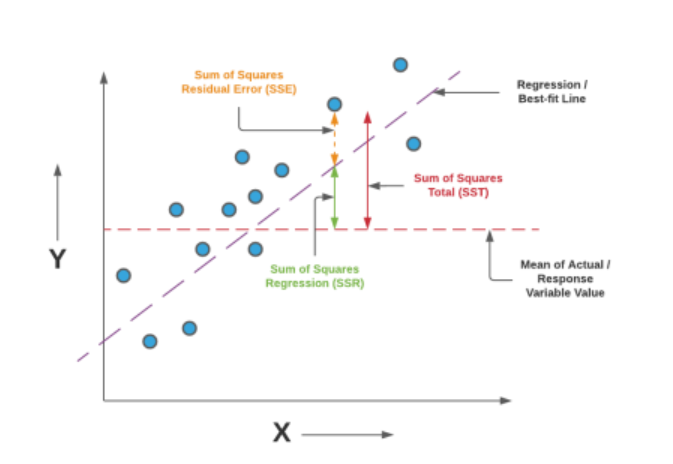

**Existem várias outras características notáveis ​​na Última Tabela.**

Primeiramente, observe que a soma de $y$ e a soma de $\hat{y}$ são **ambas zero**. Isso sempre será o caso, pois essas variáveis ​​foram criadas subtraindo suas respectivas médias de cada valor.

Observe também que a **média de $Y-\hat{Y}$ é 0**. Isso indica que, embora alguns valores de Y sejam maiores que seus respectivos valores previstos de Y e alguns sejam menores, a diferença média é zero.


**O $SSY$ é a variação total, o $\widehat{SSY}$ é a variação explicada e o $SSE$ é a variação não explicada**. Portanto, a proporção da variação explicada pode ser calculada como:

$\text{Proporção explicada} = \frac{\widehat{SSY}}{SSY}$

Da mesma forma, a proporção não explicada é:

$\text{Proporção não explicada} = \frac{SSE}{SSY}$


O 𝑅2(coeficiente de determinação) mede a proporção da variância total da variável dependente 𝑌 que é explicada pelo modelo de regressão.

Ex: R2 = 0.73 significa que	73% da variação de  Y é explicada pelo modelo, 27% é erro

**Erro esse que reflete ruído, variáveis não incluídas, ou relações não lineares.**

#✉️ Regressão no Statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Criando um DataFrame de exemplo
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [1, 2, 1.3, 3.75, 2.25]
})


In [ ]:
# 1. Adicionar constante (termo intercepto)
X = sm.add_constant(df['X'])  # Isso adiciona uma coluna com 1 para o intercepto
y = df['Y']

In [ ]:
# 2. Criar o modelo
modelo = sm.OLS(y, X)

In [ ]:
# 3. Ajustar (fit)
resultado = modelo.fit()

In [ ]:
# 4. Ver o resumo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1.942
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.258
Time:                        20:24:11   Log-Likelihood:                -5.6369
No. Observations:                   5   AIC:                             15.27
Df Residuals:                       3   BIC:                             14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7850      1.012      0.776      0.4

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Interpretação do sumário:

* coef: Coeficientes (intercepto e inclinação)
* std err:	Erro padrão dos coeficientes
* R-squared: proporção da variância explicada. No exemplo, 39,3% da variação de Y foi explicada por X.
* Adj. R-squared: 𝑅2 ajustado (corrige para nº de variáveis e número de observações). No exemplo, como há poucos dados, ele cai.
* F-statistic:	Teste F global da regressão
* Prob (F-statistic): Valor-p do teste F. No exemplo, como é maior que 0.05, não há evidência de que o modelo seja significativo como um todo.
* Durbin-Watson	Autocorrelação dos resíduos
* Cond. No.: Número de condição (detecta colinearidade)
* Df Model: Graus de liberdade do modelo. 1 variável explicativa (X).
* Skew / Kurtosis / JB: Diagnóstico de normalidade dos resíduos

Intepretação dos coeficientes:
* Intercepto: Valor de Y quando X = 0
* Coeficiente de x: A cada 1 unidade a mais em X, espera-se aumento de 0.425 em Y. Porém, não é estatisticamente significativo (p-valor > 0.05).

# ✉️ Regressão no Scikit-learn

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Dados
X = df[['X']]  # Importante: precisa ser 2D (matriz)
y = df['Y']    # Pode ser 1D (vetor)

# Criar e ajustar o modelo
modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

In [ ]:
# Intercepto (β₀)
print("Intercepto:", modelo.intercept_)

# Coeficiente (β₁)
print("Coeficiente de X:", modelo.coef_[0])

# Previsões
y_pred = modelo.predict(X)

Intercepto: 0.7849999999999999
Coeficiente de X: 0.42500000000000004


Com base nos seus dados anteriores, o scikit-learn vai ajustar a mesma equação de regressão que vimos no statsmodels

# 😮‍💨 Comparação das bibliotecas

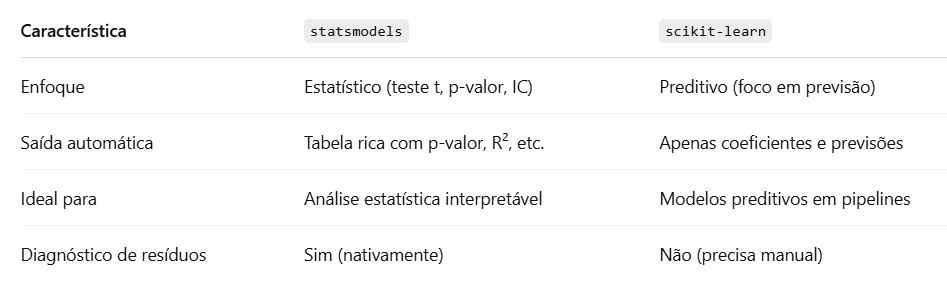